In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel(r'C:\Users\acer\truth_table.xlsx')

In [3]:
df

,Strong Structure,Support,Tightly Planked,Wear Proper harness,Distance from electric line > 10 m,Base/Landing Surface,Proper PPE kits,Training to workers,Toeboard,Safe,Sever,Injury
0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,1,0,1,1
2,0,0,0,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,1,1,0,1,1
4,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
507,1,1,1,1,1,1,0,1,1,0,1,1
508,1,1,1,1,1,1,1,0,0,0,0,1
509,1,1,1,1,1,1,1,0,1,0,0,1
510,1,1,1,1,1,1,1,1,0,1,0,0


In [4]:
df.head()

,Strong Structure,Support,Tightly Planked,Wear Proper harness,Distance from electric line > 10 m,Base/Landing Surface,Proper PPE kits,Training to workers,Toeboard,Safe,Sever,Injury
0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,1,0,1,1
2,0,0,0,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,1,1,0,1,1
4,0,0,0,0,0,0,1,0,0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Strong Structure                    512 non-null    int64
 1   Support                             512 non-null    int64
 2   Tightly Planked                     512 non-null    int64
 3   Wear Proper harness                 512 non-null    int64
 4   Distance from electric line > 10 m  512 non-null    int64
 5   Base/Landing Surface                512 non-null    int64
 6   Proper PPE kits                     512 non-null    int64
 7   Training to workers                 512 non-null    int64
 8   Toeboard                            512 non-null    int64
 9   Safe                                512 non-null    int64
 10  Sever                               512 non-null    int64
 11  Injury                              512 non-null    int64
dtypes: int64

# Building the model

# 1. Decision tree

## A)For safe cases:

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [8]:
X = df.drop(['Safe','Sever','Injury'],axis = 1)


In [9]:
y = df['Safe']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Calculating the lengths

In [11]:
len(X_train)


409

In [12]:
len(X_test)

103

In [13]:
len(y_test)

103

In [14]:
len(y_train)

409

### Fitting the model

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

### Prediction

In [16]:
model.predict([[0,0,0,1,1,1,0,0,1]])

array([0], dtype=int64)

In [17]:
model.predict([[1,1,1,1,1,0,1,1,0]])

array([1], dtype=int64)

In [18]:
y_predicted = model.predict(X_test)

In [19]:
model.score(X_test,y_test)

1.0

In [20]:
model.score(X,y)

1.0

In [21]:
model.score(X_train,y_train)

1.0

### Confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm = confusion_matrix(y,model.predict(X))

In [24]:
cm

array([[504,   0],
       [  0,   8]], dtype=int64)

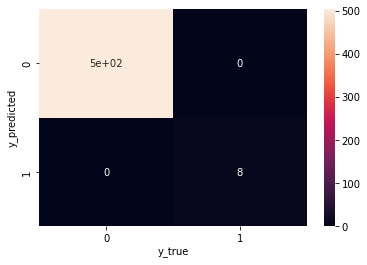

In [25]:
%matplotlib inline
sns.heatmap(cm,annot = True)
plt.xlabel('y_true')
plt.ylabel('y_predicted')
plt.show()

### Classification Report

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00         2

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



## B) For sever cases:

In [28]:
y_sever = df['Sever']

In [29]:
X_sever_train,X_sever_test,y_sever_train,y_sever_test = train_test_split(X,y_sever,test_size=0.1)

In [102]:
print('length of X_sever_train: ',len(X_sever_train))
print('length of X_sever_test: ',len(X_sever_test))
print('length of y_sever_train: ',len(y_sever_train))
print('length of y_sever_test: ',len(y_sever_test))

length of X_sever_train:  460
length of X_sever_test:  52
length of y_sever_train:  460
length of y_sever_test:  52


In [103]:
model_sever = tree.DecisionTreeClassifier()

In [104]:
model_sever.fit(X_sever_train,y_sever_train)

DecisionTreeClassifier()

In [105]:
y_sever_predicted = model_sever.predict(X_sever_test)

In [106]:

model_test_s = model_sever.score(X_sever_test,y_sever_test)
model_train_s = model_sever.score(X_sever_train,y_sever_train)

In [107]:
print('Test score: ',model_test_s)
print('Train score: ',model_train_s)

Test score:  1.0
Train score:  1.0


In [108]:
cm_sever = confusion_matrix(y_sever_test,y_sever_predicted)

In [109]:
cm_sever

array([[ 3,  0],
       [ 0, 49]], dtype=int64)

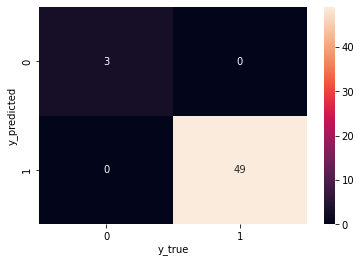

In [110]:
%matplotlib inline
sns.heatmap(cm_sever,annot = True)
plt.xlabel('y_true')
plt.ylabel('y_predicted')
plt.show()


In [111]:
model_sever.predict([[0,0,0,0,0,1,0,0,1]])

array([1], dtype=int64)

## C) For Injury cases : 

In [112]:
y_injury = df['Sever']

In [113]:
X_injury_train,X_injury_test,y_injury_train,y_injury_test = train_test_split(X,y_injury,test_size=0.2)

In [114]:
print('length of X_injury_train: ',len(X_injury_train))
print('length of X_injury_test: ',len(X_injury_test))
print('length of y_injury_train: ',len(y_injury_train))
print('length of y_injury_test: ',len(y_injury_test))

length of X_injury_train:  409
length of X_injury_test:  103
length of y_injury_train:  409
length of y_injury_test:  103


In [115]:
model_injury = tree.DecisionTreeClassifier()

In [116]:
model_injury.fit(X_injury_train,y_injury_train)

DecisionTreeClassifier()

In [117]:
y_injury_predicted = model_injury.predict(X_injury_test)

In [118]:
model_test_i = model_injury.score(X_injury_test,y_injury_test)
model_train_i = model_injury.score(X_injury_train,y_injury_train)

In [119]:
print('Test score: ',model_test_i)
print('Train score: ',model_train_i)

Test score:  1.0
Train score:  1.0


In [120]:
cm_injury = confusion_matrix(y_injury_test,y_injury_predicted)

In [121]:
cm_injury

array([[  1,   0],
       [  0, 102]], dtype=int64)

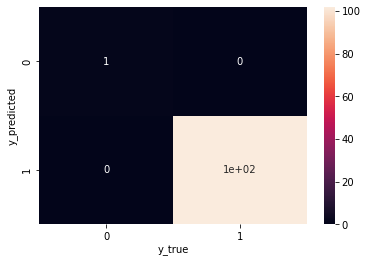

In [122]:
%matplotlib inline
sns.heatmap(cm_injury,annot = True)
plt.xlabel('y_true')
plt.ylabel('y_predicted')
plt.show()

# SVM

## For safe cases:


In [123]:
from sklearn import svm
model_svmsafe = svm.SVC()

In [124]:
model_svmsafe.fit(X_train,y_train)

SVC()

In [138]:
y_p = model_svmsafe.predict(X_test)

In [137]:
svmscoresafe_test = model_svmsafe.score(X_test,y_test)
svmscoresafe_train = model_svmsafe.score(X_train,y_train)

In [139]:
print('Test score: ',svmscoresafe_test)
print('Train score: ',svmscoresafe_train)

Test score:  0.9902912621359223
Train score:  0.9828850855745721


In [140]:
cm_svm = confusion_matrix(y,model_svmsafe.predict(X))

In [141]:
cm_svm

array([[504,   0],
       [  8,   0]], dtype=int64)

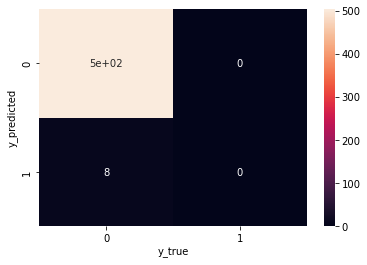

In [142]:
%matplotlib inline
sns.heatmap(cm_svm,annot = True)
plt.xlabel('y_true')
plt.ylabel('y_predicted')
plt.show()


## For sever cases:

In [132]:
model_svmsever = svm.SVC()

In [133]:
X_sever_train,X_sever_test,y_sever_train,y_sever_test = train_test_split(X,y_sever,test_size=0.1)
model_svmsever.fit(X_sever_train,y_sever_train)

SVC()

In [134]:
print('length of X_sever_train: ',len(X_sever_train))
print('length of X_sever_test: ',len(X_sever_test))
print('length of y_sever_train: ',len(y_sever_train))
print('length of y_sever_test: ',len(y_sever_test))

length of X_sever_train:  460
length of X_sever_test:  52
length of y_sever_train:  460
length of y_sever_test:  52


In [146]:
y_p_seversvm = model_svmsever.predict(X_sever_test)

In [144]:
svmscoresever_test = model_svmsever.score(X_sever_test,y_sever_test)
svmscoresever_train = model_svmsever.score(X_sever_train,y_sever_train)

In [145]:
print('Test score: ',svmscoresever_test)
print('Train score: ',svmscoresever_train)

Test score:  0.9807692307692307
Train score:  0.9934782608695653


In [147]:
cm_svm_sever = confusion_matrix(y_sever,model_svmsever.predict(X))
cm_svm_sever 

array([[  8,   4],
       [  0, 500]], dtype=int64)

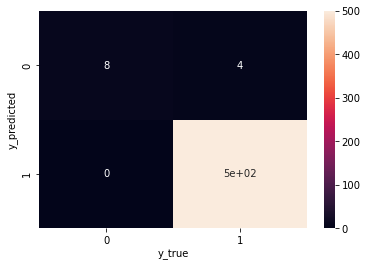

In [149]:
%matplotlib inline
sns.heatmap(cm_svm_sever,annot = True)
plt.xlabel('y_true')
plt.ylabel('y_predicted')
plt.show()

## For injury cases:

In [152]:
model_svminjury = svm.SVC()
model_svminjury.fit(X_injury_train,y_injury_train)

SVC()

In [156]:
svmscoreinjury_test = model_svminjury.score(X_injury_test,y_injury_test)
svmscoreinjury_train = model_svminjury.score(X_injury_train,y_injury_train)

In [157]:
print('Test score: ',svmscoreinjury_test)
print('Train score: ',svmscoreinjury_train)

Test score:  0.9902912621359223
Train score:  0.9926650366748166


In [154]:
print('length of X_injury_train: ',len(X_injury_train))
print('length of X_injury_test: ',len(X_injury_test))
print('length of y_injury_train: ',len(y_injury_train))
print('length of y_injury_test: ',len(y_injury_test))

length of X_injury_train:  409
length of X_injury_test:  103
length of y_injury_train:  409
length of y_injury_test:  103


In [153]:
cm_svm_injury = confusion_matrix(y_injury,model_svminjury.predict(X))
cm_svm_injury 

array([[  8,   4],
       [  0, 500]], dtype=int64)

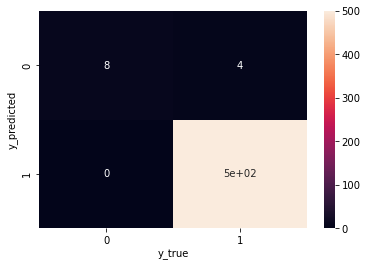

In [155]:
%matplotlib inline
sns.heatmap(cm_svm_injury,annot = True)
plt.xlabel('y_true')
plt.ylabel('y_predicted')
plt.show()

### When comparing the two models , decision tree seems to have better accuracy

### Hence we can choose to go with Decision Tree

In [58]:
df.head()

,Strong Structure,Support,Tightly Planked,Wear Proper harness,Distance from electric line > 10 m,Base/Landing Surface,Proper PPE kits,Training to workers,Toeboard,Safe,Sever,Injury
0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,1,0,1,1
2,0,0,0,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,1,1,0,1,1
4,0,0,0,0,0,0,1,0,0,0,1,1


## Questions

In [59]:
questions = {
    "Strong Structure":
       {
        "que":"Is the structure strong? ",
        "options":["True","False"]  
    },
    "Support":
       {
        "que":"Is there strong support for the scaffolding?",
        "options":["True","False"]  
    },
   "Tightly Planked	":
       {
        "que":"Is the scaffolding tightly planked? ",
        "options":["True","False"]  
    },
    "Wear Proper harness":
       {
        "que":"Are the workers wearing proper harness? ",
        "options":["True","False"]  
    },
   "Distance from electric line > 10 m":
       {
        "que":"Is the distance from electric line greater than 10m? ",
        "options":["True","False"]  
    },
    "Base/Landing Surface":
       {
        "que":"Is the base/landing surface smooth? ",
        "options":["True","False"]  
    },
   "Proper PPE kits":
       {
        "que":"Are the workers wearing proper PPE kits? ",
        "options":["True","False"]  
    },
    "Training to workers":
       {
        "que":"Are the workers properly trained with the safety protocols and methods? ",
        "options":["True","False"]  
    },
    "Toeboard":
        {
        "que":"Are there toeboards present?",
        "options":["True","False"]  
    }
    
}

In [60]:
questions["Support"]["options"][0]

'True'

In [ ]:
get and post method